In [1]:
import numpy as np 

In [251]:
rng = np.random.default_rng(seed = 1234)
cl1 = rng.multivariate_normal([-2,-2], [[1,-0.5],[-0.5,1]], size=100)
cl2 = rng.multivariate_normal([1,0], [[1,0],[0,1]], size=150)
cl3 = rng.multivariate_normal([3,2], [[1,-0.7],[-0.7,1]], size=200)
pts = np.concatenate((cl1,cl2,cl3))

In [252]:
import matplotlib.pyplot as plt 

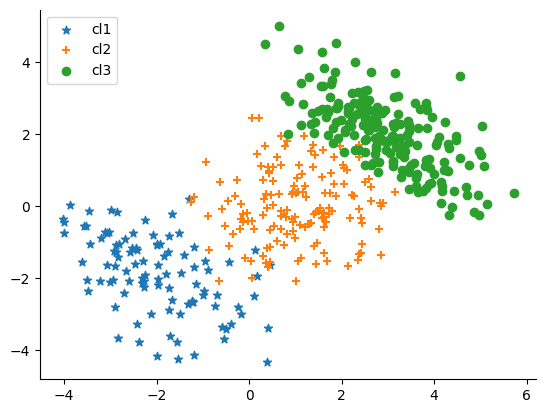

In [253]:
fig, ax = plt.subplots()
#plt.grid(True)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.scatter(cl1[:,0], cl1[:,1], marker="*", label="cl1")
plt.scatter(cl2[:,0], cl2[:,1], marker="+", label="cl2")
plt.scatter(cl3[:,0], cl3[:,1], label="cl3")
plt.legend()
plt.savefig("../images/kmeans_data.pdf")

## Using k-means 

In [254]:
from scipy.cluster.vq import kmeans
ctr, dist = kmeans(pts, 3)

In [255]:
ctr

array([[ 2.84494325,  1.95323228],
       [ 0.91376555, -0.21935255],
       [-2.03956666, -1.85662027]])

In [256]:
[cl1.mean(axis=0),
cl2.mean(axis=0),
cl3.mean(axis=0)]


[array([-2.00474615, -1.87275596]),
 array([1.03849018, 0.01417119]),
 array([2.94641907, 2.02514165])]

In [257]:
dist 

1.2204335829465707

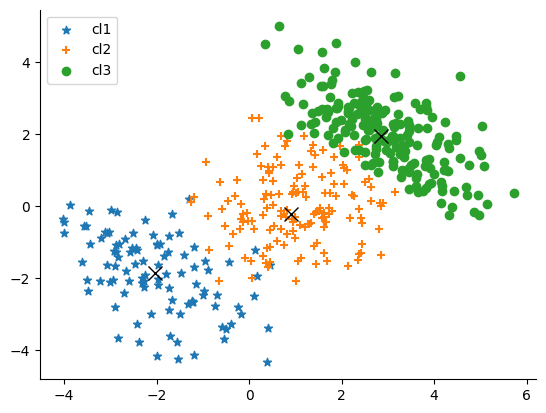

In [35]:
fig, ax = plt.subplots()
#plt.grid(True)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.scatter(cl1[:,0], cl1[:,1], marker="*", label="cl1")
plt.scatter(cl2[:,0], cl2[:,1], marker="+", label="cl2")
plt.scatter(cl3[:,0], cl3[:,1], label="cl3")

plt.plot(ctr[:,0],ctr[:,1],"x", color="black",markersize=10)
plt.legend()

In [116]:
kmeans?

In [37]:
pts.shape 

(450, 2)

In [148]:
def mykmeans(data, k, itrs=10) : 
    shape_ = (k, np.array(data).shape[-1])
    means = np.random.uniform(np.min(data), np.max(data), size=shape_)
    
    for t in range(itrs) : 
        S = []
        for i in range(k) : 
            S_i = []
            for p in range(len(data)) : 
                for j in range(k) : 
                    if np.linalg.norm(np.array(data[p])-np.array(means[i]))**2 <= np.linalg.norm(np.array(data[p])-np.array(means[j]))**2:
                        if len(S) > 0 : 
                            if p not in np.concatenate(S) : 
                                S_i += [p]
                        else : 
                            S_i += [p]
            S += [S_i]
        print([data[si] for si in S])
        means = [np.mean(data[si], axis=0).tolist() for si in S ]
        #print(len(S), means)
                    
    return means, S

In [149]:
np.linalg.norm([1,2], ord=2)**2

5.000000000000001

In [150]:
m, cls = mykmeans(pts, 3, 1)

[array([[-0.57898663, -3.35691346],
       [-0.57898663, -3.35691346],
       [-0.57898663, -3.35691346],
       ...,
       [ 2.69860424,  2.43493782],
       [ 2.69860424,  2.43493782],
       [ 2.44971355,  2.71949949]]), array([], shape=(0, 2), dtype=float64), array([], shape=(0, 2), dtype=float64)]


In [142]:
m 

[[1.210183836168727, 0.4886186975815227], [nan, nan], [nan, nan]]

In [143]:
len(np.concatenate(cls))

450

In [258]:
ctr, dist 

(array([[ 2.84494325,  1.95323228],
        [ 0.91376555, -0.21935255],
        [-2.03956666, -1.85662027]]),
 1.2204335829465707)

In [269]:
err = [0., 0., 0.]
cls = [cl1, cl2, cl3]
for i in range(3): 
    for pt in cls[i] : 
        err[i] += np.linalg.norm(np.array(pt)-np.array(cls[i].mean(axis=0)))
np.array(err)/len(pts)

array([0.30098184, 0.41720274, 0.53675941])

In [270]:
sum(np.array(err)/len(pts))/3

0.41831466353415375

In [243]:
ks = range(1,10)
dists = [kmeans(pts, k)[1] for k in ks]
np.array(dists).reshape((-1,1))

array([[1.32914025],
       [0.81859012],
       [0.54196384],
       [0.40111932],
       [0.31119035],
       [0.20481177],
       [0.12502571],
       [0.08254655],
       [0.02850542]])

## k-means distortion plot

The mean (non-squared) Euclidean distance between the observations passed and the centroids generated.


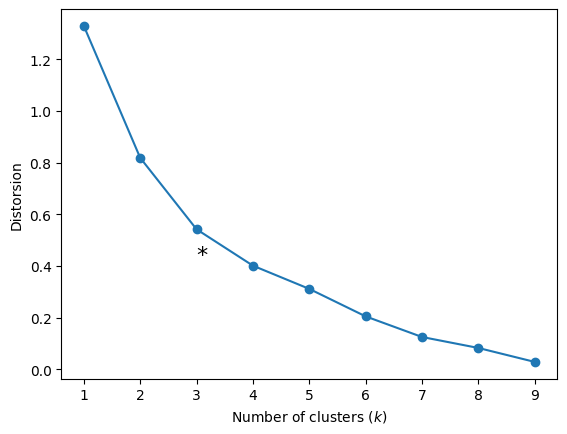

In [277]:
plt.plot(range(1,10),dists, "o-")
plt.text(3,0.4183, "*", fontsize=16 )
plt.xlabel(r"Number of clusters ($k$)")
plt.ylabel(r"Distorsion")
plt.show()

## Example 3 - (Very) Basic optimization: scalar function minimization

In [153]:
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

In [161]:
x = np.linspace(-8, 5, 200)
y = f(x)

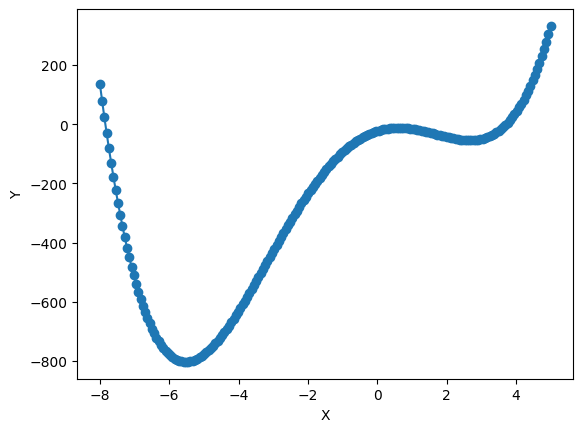

In [164]:
plt.plot(x, y , "o-")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("../images/saclar_function.pdf")
plt.show()

## Local minima problem 

In [165]:
def f(x):
    return -np.sinc(x-5)

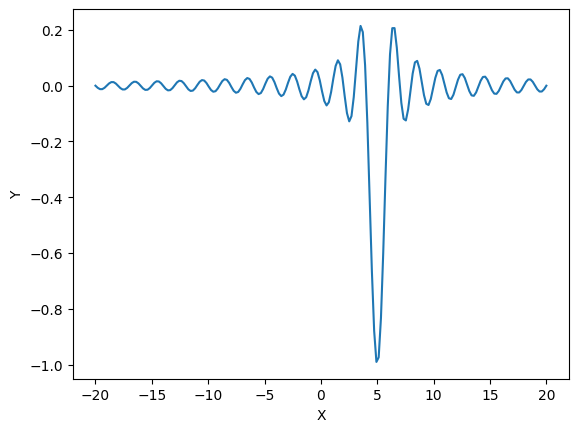

In [167]:
x = np.linspace(-20, 20, 200)
y = f(x)
plt.plot(x, y , "-")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("../images/sin_function.pdf")
plt.show()

In [168]:
from scipy.optimize import minimize_scalar

In [169]:
res = minimize_scalar(f)
res

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.049029624014074166
       x: -1.4843871263953001
     nit: 10
    nfev: 14

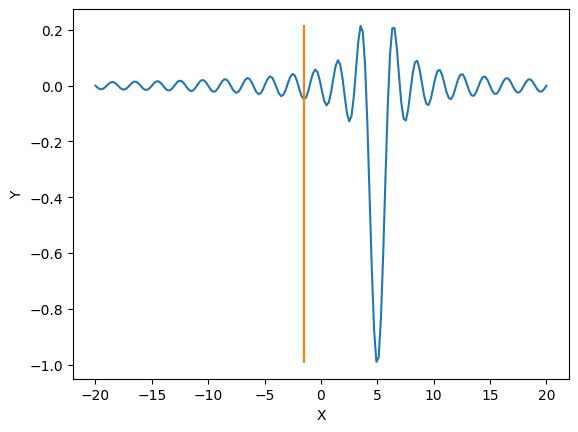

In [170]:
plt.plot(x, y , "-")
plt.plot([res.x]*len(y), y)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("../images/sin_function_min.pdf")
plt.show()

In [171]:

rng = np.random.default_rng(seed=1234)
lower = rng.uniform(-20, 20, 100)
upper = lower + 1
sols = [minimize_scalar(f, bracket=(l,u)) for l,u in zip(lower, upper)]
funs = [sol.fun for sol in sols]
best = sols[np.argmin(funs)]
best

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -1.0
       x: 5.000000000618556
     nit: 8
    nfev: 11

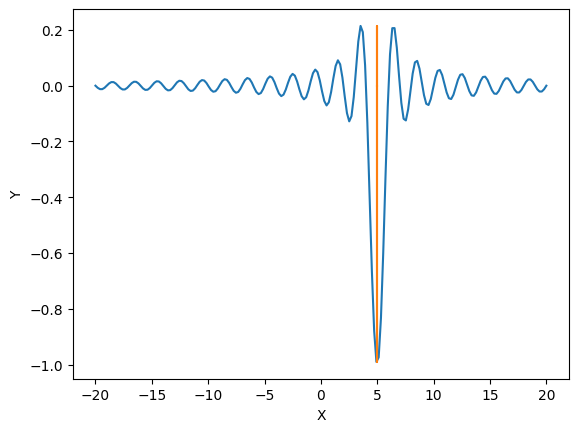

In [172]:
plt.plot(x, y , "-")
plt.plot([best.x]*len(y), y)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("../images/sin_function_best.pdf")
plt.show()

In [174]:
from scipy.spatial import KDTree

In [181]:
rng = np.random.default_rng(seed=12345)
pts = rng.multivariate_normal(
  [0,0], [[1,.8],[.8,1]], 
  size=10
)
pts

array([[ 0.951133  ,  1.75038506],
       [ 0.90794002,  0.74402448],
       [ 0.30576524, -0.16281136],
       [ 1.09240417,  1.50280001],
       [ 0.27501972, -0.96007933],
       [-2.53321395, -1.92068272],
       [ 0.43511779,  1.00571808],
       [ 0.46218239,  0.42379897],
       [-0.3509701 , -1.14575681],
       [-0.98870241, -0.1039104 ]])

0 [0.951133   1.75038506]
1 [0.90794002 0.74402448]
2 [ 0.30576524 -0.16281136]
3 [1.09240417 1.50280001]
4 [ 0.27501972 -0.96007933]
5 [-2.53321395 -1.92068272]
6 [0.43511779 1.00571808]
7 [0.46218239 0.42379897]
8 [-0.3509701  -1.14575681]
9 [-0.98870241 -0.1039104 ]


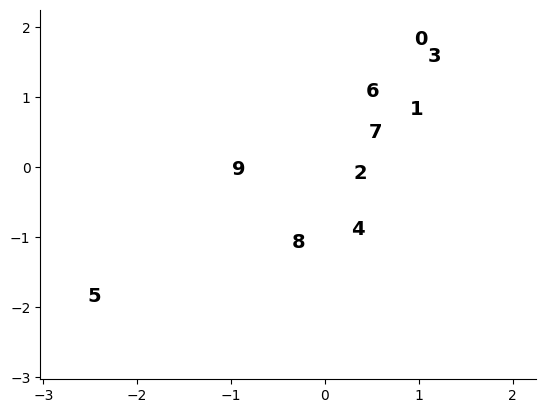

In [223]:

fig, ax = plt.subplots()
#plt.grid(True)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xlim((np.min(pts)-0.5, np.max(pts)+0.5))
plt.ylim((np.min(pts)-0.5, np.max(pts)+0.5))
for i, pt in enumerate(pts) : 
    print(i, pt)
    plt.text(pt[0], pt[1], str(i), fontsize=14, weight="bold")
plt.savefig("../images/kdtree.pdf")
plt.show()

In [182]:
kd = KDTree(pts)

In [183]:
kd 

In [184]:
dir(kd)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_weights',
 'boxsize',
 'count_neighbors',
 'data',
 'indices',
 'innernode',
 'leafnode',
 'leafsize',
 'm',
 'maxes',
 'mins',
 'n',
 'node',
 'query',
 'query_ball_point',
 'query_ball_tree',
 'query_pairs',
 'size',
 'sparse_distance_matrix',
 'tree']

In [187]:
dist, i = kd.query(pts[6, :], k=3)

In [188]:
dist 

array([0.        , 0.54041133, 0.58254815])

In [189]:
i

array([6, 1, 7])

In [193]:
import scipy 

In [200]:
kd.data

array([[ 0.951133  ,  1.75038506],
       [ 0.90794002,  0.74402448],
       [ 0.30576524, -0.16281136],
       [ 1.09240417,  1.50280001],
       [ 0.27501972, -0.96007933],
       [-2.53321395, -1.92068272],
       [ 0.43511779,  1.00571808],
       [ 0.46218239,  0.42379897],
       [-0.3509701 , -1.14575681],
       [-0.98870241, -0.1039104 ]])

In [208]:
dir(kd.leafnode.children)

['__class__',
 '__delattr__',
 '__delete__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__isabstractmethod__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__set__',
 '__set_name__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'deleter',
 'fdel',
 'fget',
 'fset',
 'getter',
 'setter']

In [224]:
from scipy.spatial import ConvexHull

In [227]:
hull = ConvexHull(pts)
hull 

In [228]:
dir(hull)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_points',
 '_points',
 '_qhull',
 '_update',
 '_vertices',
 'add_points',
 'area',
 'close',
 'coplanar',
 'equations',
 'good',
 'max_bound',
 'min_bound',
 'ndim',
 'neighbors',
 'npoints',
 'nsimplex',
 'points',
 'simplices',
 'vertices',
 'volume']

In [230]:
hull.simplices

array([[0, 3],
       [4, 5],
       [9, 5],
       [9, 0],
       [1, 3],
       [1, 4]], dtype=int32)

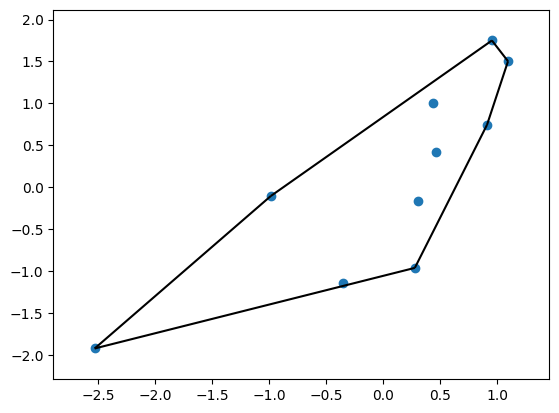

In [233]:
scipy.spatial.convex_hull_plot_2d(hull)
plt.savefig("../images/convexhull.pdf")

In [234]:
from scipy.spatial import Delaunay
tri = Delaunay(pts)
tri

In [235]:
dir(tri)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_points',
 '_points',
 '_qhull',
 '_transform',
 '_update',
 '_vertex_neighbor_vertices',
 '_vertex_to_simplex',
 '_vertices',
 'add_points',
 'close',
 'convex_hull',
 'coplanar',
 'equations',
 'find_simplex',
 'furthest_site',
 'good',
 'lift_points',
 'max_bound',
 'min_bound',
 'ndim',
 'neighbors',
 'npoints',
 'nsimplex',
 'paraboloid_scale',
 'paraboloid_shift',
 'plane_distance',
 'points',
 'simplices',
 'transform',
 'vertex_neighbor_vertices',
 'vertex_to_simplex',
 'vertices']

In [236]:
tri.simplices

array([[8, 9, 5],
       [4, 8, 5],
       [9, 8, 2],
       [8, 4, 2],
       [4, 1, 2],
       [6, 1, 3],
       [0, 6, 3],
       [6, 0, 9],
       [7, 9, 2],
       [7, 6, 9],
       [1, 7, 2],
       [7, 1, 6]], dtype=int32)

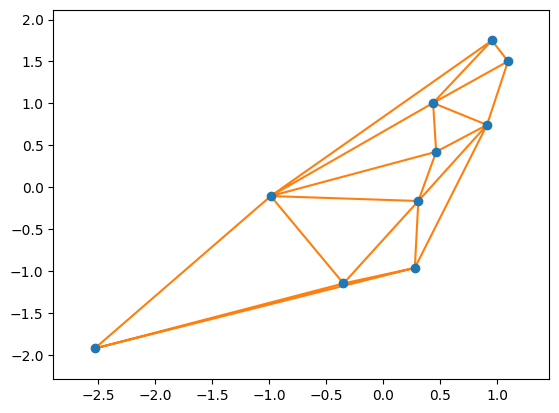

In [238]:
scipy.spatial.delaunay_plot_2d(tri)
plt.savefig("../images/delaunay.pdf")

In [239]:
from scipy.spatial import Voronoi
vor = Voronoi(pts)
vor

In [240]:
dir(vor)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_points',
 '_points',
 '_qhull',
 '_ridge_dict',
 '_update',
 'add_points',
 'close',
 'furthest_site',
 'max_bound',
 'min_bound',
 'ndim',
 'npoints',
 'point_region',
 'points',
 'regions',
 'ridge_dict',
 'ridge_points',
 'ridge_vertices',
 'vertices']

In [241]:
vor.vertices

array([[ -1.56917821,  -1.17533646],
       [  7.94738786, -27.97463108],
       [ -0.3550644 ,  -0.43215628],
       [ -0.18923926,  -0.54294902],
       [  1.98860973,  -0.62693469],
       [  0.83175084,   1.16435674],
       [  0.64483401,   1.41151497],
       [ -2.98645423,   3.92780753],
       [ -0.32091034,   0.31844817],
       [ -0.44985535,   0.67296975],
       [  1.15930838,  -0.07624587],
       [  0.58645847,   0.72116788]])

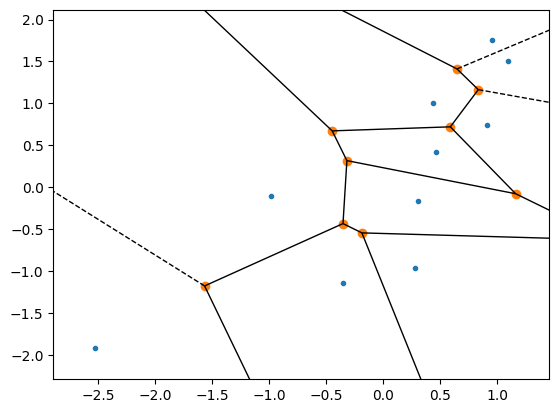

In [242]:
scipy.spatial.voronoi_plot_2d(vor)
plt.savefig("../images/veronoid.pdf")

In [278]:
scipy.__version__

'1.10.1'